In [33]:
import pandas as pd

In [34]:
from scipy.cluster.hierarchy import linkage, dendrogram

In [35]:
REPO = '../../'
filename = REPO + 'data/HDB_0101_0127.xlsx'
N_USER = 27
N_POINT = 26 # ID 16はアンケートデータがないので除外
N_STEP = 10 # 数値データを何段階にカテゴライズするか

In [36]:
df_org = pd.ExcelFile(filename).parse(0)

In [37]:
index = [i for i in range(N_USER)]
#User index

In [38]:
index.remove(15) # ID 16はアンケートデータがないので除外
point_to_user = {}
for i, idx in enumerate(index):
    point_to_user[i] = idx
point_to_user

{0: 0,
 1: 1,
 2: 2,
 3: 3,
 4: 4,
 5: 5,
 6: 6,
 7: 7,
 8: 8,
 9: 9,
 10: 10,
 11: 11,
 12: 12,
 13: 13,
 14: 14,
 15: 16,
 16: 17,
 17: 18,
 18: 19,
 19: 20,
 20: 21,
 21: 22,
 22: 23,
 23: 24,
 24: 25,
 25: 26}

In [39]:
df = df_org.iloc[index,:]

In [40]:
df

,データID,回答日,回答時間,ANS_TIME,性別,年齢,年代,星座,血液型,最終学歴,...,リスク_破裂数,リスク_総獲得時間,バブルへの反応_ 検出回数,バブルへの反応_総損益,意思決定合理性,自信過剰傾向_株価の予想範囲,自信過剰傾向_投資への自信,自信過剰傾向_知識への自信,自信過剰傾向_その他,セルフコントロール
0,101,2018-01-22,13:38:49:296,00:34:22:262,2.0,22.0,2.0,6.0,3.0,2.0,...,0.0,26.9,1.0,949.0,1.0,1000.0,0.0,0.0,-0.292046,46.0
1,102,2018-02-07,10:39:20:060,00:36:10:313,2.0,26.0,2.0,5.0,3.0,5.0,...,2.0,20.7,2.0,754.5,3.0,6000.0,2.0,1.0,-0.117030,36.0
2,103,2018-02-06,13:32:09:201,00:32:40:896,1.0,23.0,2.0,1.0,2.0,5.0,...,1.0,22.6,0.0,-112.5,2.0,3000.0,20.0,0.0,0.565700,42.0
3,104,2018-02-05,10:51:40:977,00:37:24:408,1.0,24.0,2.0,5.0,3.0,5.0,...,1.0,19.5,0.0,2175.0,4.0,10000.0,28.0,22.0,1.362625,49.0
4,105,2018-02-19,16:35:56:666,00:31:30:199,1.0,24.0,2.0,4.0,2.0,5.0,...,1.0,22.4,1.0,821.5,2.0,4000.0,9.0,4.0,0.011018,45.0
5,106,2018-02-20,10:42:53:842,00:36:01:444,2.0,24.0,2.0,11.0,3.0,5.0,...,1.0,22.3,2.0,1601.5,2.0,1476.0,20.0,3.0,-0.180962,44.0
6,107,2018-02-05,15:31:03:209,00:31:10:091,1.0,23.0,2.0,5.0,3.0,2.0,...,2.0,24.4,2.0,2946.5,2.0,1800.0,35.0,30.0,0.378504,42.0
7,108,2018-02-07,15:30:22:822,00:32:28:338,2.0,24.0,2.0,3.0,2.0,5.0,...,0.0,23.7,2.0,1729.0,1.0,5000.0,25.0,0.0,-0.222505,55.0
8,109,2018-01-26,13:53:21:887,00:51:09:249,2.0,46.0,4.0,10.0,1.0,4.0,...,1.0,17.1,2.0,1453.0,1.0,7000.0,2.0,0.0,0.655671,45.0
9,110,2018-02-06,15:35:15:345,00:37:11:285,1.0,24.0,2.0,9.0,3.0,5.0,...,1.0,17.2,1.0,635.5,2.0,15000.0,13.0,6.0,-0.214519,43.0


In [41]:
assert(df.shape[0] == 26)
df.shape

(26, 213)

In [42]:
cols = [
    '性別',
    '年齢',
    '星座',
    '血液型',
    '最終学歴',
    '利き手',
    '出身地',
    '身長と体重_身長',
    '身長と体重_体重',
    '現住地_都道府県',
    '婚姻',
    '住居形態',
    '子供人数',
    '世帯年収',
    '個人年収',
    '職業',
    '転職経験',
    '生活費_月平均',
]
basic_df = df.set_index('データID')[cols]
basic_df

,性別,年齢,星座,血液型,最終学歴,利き手,出身地,身長と体重_身長,身長と体重_体重,現住地_都道府県,婚姻,住居形態,子供人数,世帯年収,個人年収,職業,転職経験,生活費_月平均
データID,,,,,,,,,,,,,,,,,,
101,2.0,22.0,6.0,3.0,2.0,1.0,29.0,161.0,46.0,27.0,1.0,5.0,1.0,0.0,0.0,14.0,1.0,10.0
102,2.0,26.0,5.0,3.0,5.0,1.0,11.0,153.0,48.0,27.0,1.0,4.0,1.0,1000.0,50.0,13.0,1.0,12.0
103,1.0,23.0,1.0,2.0,5.0,3.0,28.0,167.0,71.0,27.0,1.0,5.0,1.0,0.0,0.0,13.0,1.0,90.0
104,1.0,24.0,5.0,3.0,5.0,1.0,39.0,174.0,59.8,27.0,1.0,5.0,1.0,50.0,50.0,13.0,1.0,8.0
105,1.0,24.0,4.0,2.0,5.0,1.0,34.0,180.0,70.0,27.0,1.0,5.0,1.0,96.0,96.0,13.0,1.0,8.0
106,2.0,24.0,11.0,3.0,5.0,1.0,40.0,161.6,49.8,27.0,1.0,4.0,1.0,35.0,35.0,13.0,1.0,12.0
107,1.0,23.0,5.0,3.0,2.0,1.0,38.0,167.2,61.0,27.0,1.0,4.0,1.0,15.0,15.0,14.0,1.0,15.0
108,2.0,24.0,3.0,2.0,5.0,1.0,38.0,148.0,43.0,27.0,1.0,4.0,1.0,50.0,50.0,13.0,1.0,10.0
109,2.0,46.0,10.0,1.0,4.0,1.0,27.0,163.0,55.0,27.0,2.0,2.0,5.0,750.0,90.0,11.0,1.0,55.0


In [43]:
numerical_cols = [
    '年齢',
    '身長と体重_身長',
    '身長と体重_体重',
    '世帯年収',
    '個人年収',
    '生活費_月平均',
]
for col in numerical_cols:
    min_val = basic_df[col].min()
    max_val = basic_df[col].max()
    print(col, min_val, max_val)
    d = (max_val - min_val) / N_STEP
    basic_df[col] = (basic_df[col].values - min_val) // d
basic_df

年齢 20.0 48.0
身長と体重_身長 147.0 185.0
身長と体重_体重 43.0 75.0
世帯年収 0.0 2000.0
個人年収 0.0 650.0
生活費_月平均 2.0 300.0


,性別,年齢,星座,血液型,最終学歴,利き手,出身地,身長と体重_身長,身長と体重_体重,現住地_都道府県,婚姻,住居形態,子供人数,世帯年収,個人年収,職業,転職経験,生活費_月平均
データID,,,,,,,,,,,,,,,,,,
101,2.0,0.0,6.0,3.0,2.0,1.0,29.0,3.0,0.0,27.0,1.0,5.0,1.0,0.0,0.0,14.0,1.0,0.0
102,2.0,2.0,5.0,3.0,5.0,1.0,11.0,1.0,1.0,27.0,1.0,4.0,1.0,5.0,0.0,13.0,1.0,0.0
103,1.0,1.0,1.0,2.0,5.0,3.0,28.0,5.0,8.0,27.0,1.0,5.0,1.0,0.0,0.0,13.0,1.0,2.0
104,1.0,1.0,5.0,3.0,5.0,1.0,39.0,7.0,5.0,27.0,1.0,5.0,1.0,0.0,0.0,13.0,1.0,0.0
105,1.0,1.0,4.0,2.0,5.0,1.0,34.0,8.0,8.0,27.0,1.0,5.0,1.0,0.0,1.0,13.0,1.0,0.0
106,2.0,1.0,11.0,3.0,5.0,1.0,40.0,3.0,2.0,27.0,1.0,4.0,1.0,0.0,0.0,13.0,1.0,0.0
107,1.0,1.0,5.0,3.0,2.0,1.0,38.0,5.0,5.0,27.0,1.0,4.0,1.0,0.0,0.0,14.0,1.0,0.0
108,2.0,1.0,3.0,2.0,5.0,1.0,38.0,0.0,0.0,27.0,1.0,4.0,1.0,0.0,0.0,13.0,1.0,0.0
109,2.0,9.0,10.0,1.0,4.0,1.0,27.0,4.0,3.0,27.0,2.0,2.0,5.0,3.0,1.0,11.0,1.0,1.0


In [44]:
result_ham = linkage(basic_df, 
                  #metric = 'braycurtis', 
                  #metric = 'canberra', 
                  #metric = 'chebyshev', 
                  #metric = 'cityblock', 
                  #metric = 'correlation', 
                  #metric = 'cosine', 
                  #metric = 'euclidean', 
                  metric = 'hamming', 
                  #metric = 'jaccard', 
                  #method= 'single')
                  #method = 'average')
                  #method= 'complete')
                  method='weighted')
result_jac = linkage(basic_df, 
                  #metric = 'braycurtis', 
                  #metric = 'canberra', 
                  #metric = 'chebyshev', 
                  #metric = 'cityblock', 
                  #metric = 'correlation', 
                  #metric = 'cosine', 
                  #metric = 'euclidean', 
                  #metric = 'hamming', 
                  metric = 'jaccard', 
                  #method= 'single')
                  #method = 'average')
                  #method= 'complete')
                  method='weighted')

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline

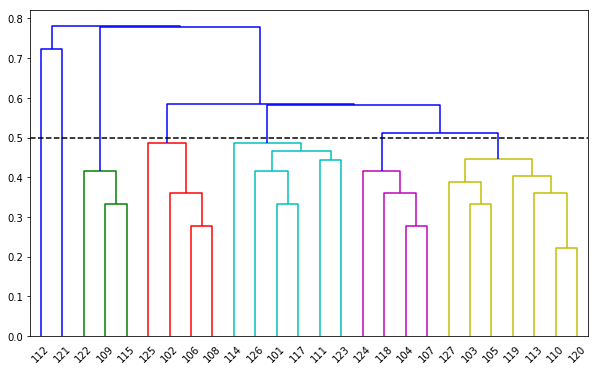

In [46]:
# 樹形図を出力する．　color_thresholdは何回か実行してみていい感じのところを探して指定
plt.figure(figsize=(10, 6))
Threshold = 0.5
dendrogram(result_ham, color_threshold=Threshold, labels=basic_df.index)
plt.hlines(Threshold, 0, 260, 'k', linestyle='dashed')
plt.savefig(REPO + 'data/vis/dendrogram_ham.png')

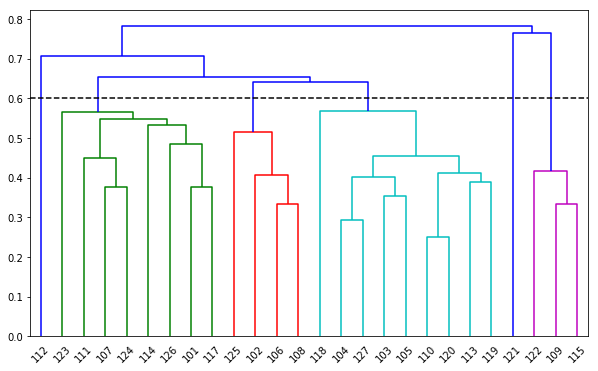

In [47]:
# 樹形図を出力する．　color_thresholdは何回か実行してみていい感じのところを探して指定
plt.figure(figsize=(10, 6))
Threshold = 0.6
dendrogram(result_jac, color_threshold=Threshold, labels=basic_df.index)
plt.hlines(Threshold, 0, 260, 'k', linestyle='dashed')
plt.savefig(REPO + 'data/vis/dendrogram_jac.png')

In [48]:
result_ham

array([[ 9.        , 18.        ,  0.22222222,  2.        ],
       [ 5.        ,  7.        ,  0.27777778,  2.        ],
       [ 3.        ,  6.        ,  0.27777778,  2.        ],
       [ 0.        , 15.        ,  0.33333333,  2.        ],
       [ 2.        ,  4.        ,  0.33333333,  2.        ],
       [ 8.        , 14.        ,  0.33333333,  2.        ],
       [ 1.        , 27.        ,  0.36111111,  3.        ],
       [16.        , 28.        ,  0.36111111,  3.        ],
       [12.        , 26.        ,  0.36111111,  3.        ],
       [25.        , 30.        ,  0.38888889,  3.        ],
       [17.        , 34.        ,  0.40277778,  4.        ],
       [22.        , 33.        ,  0.41666667,  4.        ],
       [24.        , 29.        ,  0.41666667,  3.        ],
       [20.        , 31.        ,  0.41666667,  3.        ],
       [10.        , 21.        ,  0.44444444,  2.        ],
       [35.        , 36.        ,  0.44618056,  7.        ],
       [38.        , 40.

In [49]:
df_res = basic_df.iloc[:,:3] # クラスタリングの出来具合を確認．性別，　年齢，年代のカラムを抽出

In [52]:
import numpy as np

/home/inagaki/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


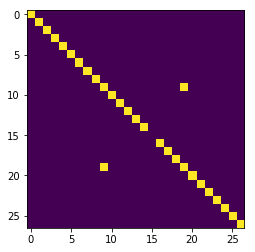

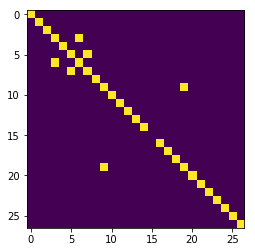

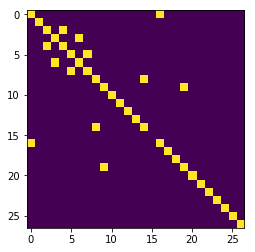

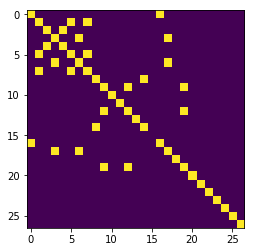

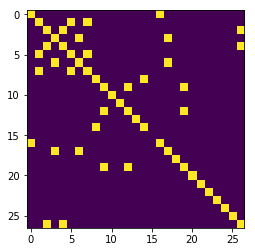

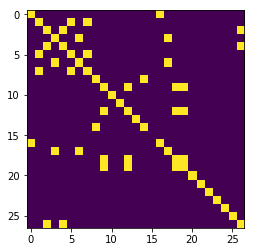

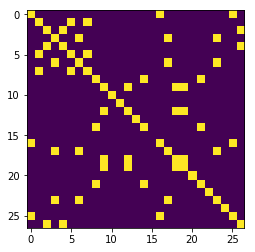

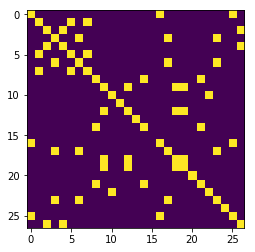

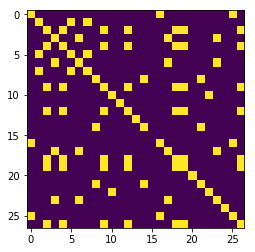

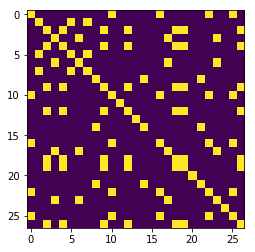

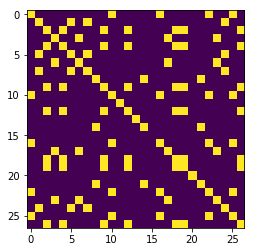

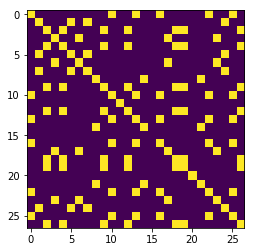

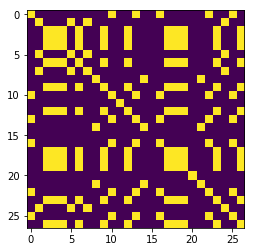

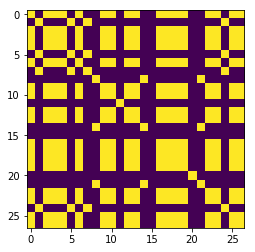

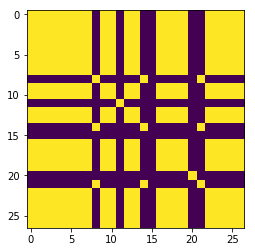

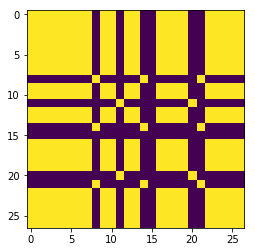

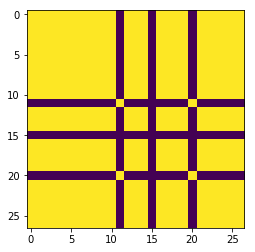

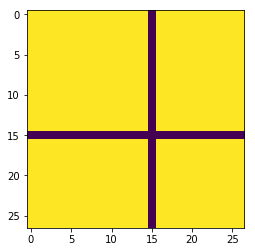

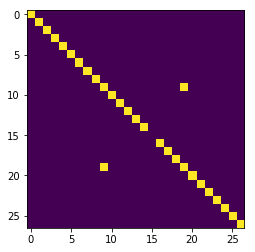

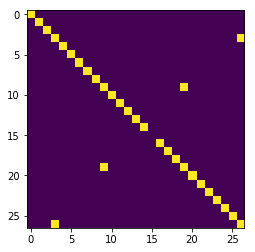

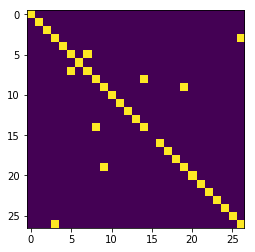

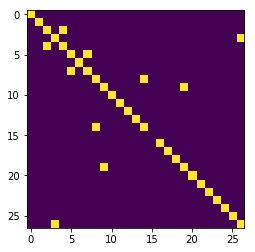

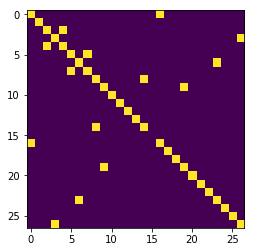

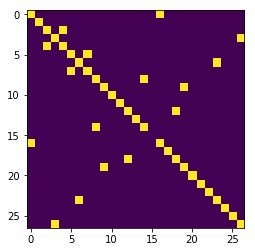

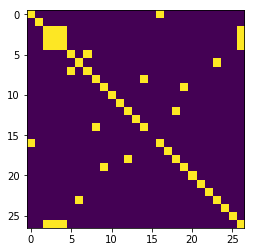

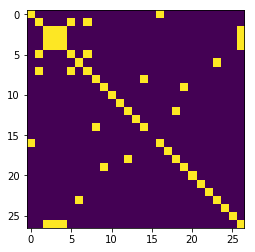

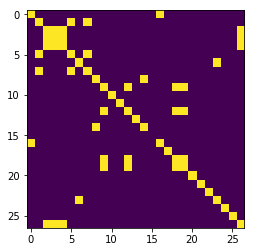

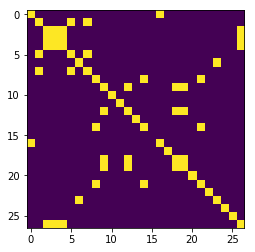

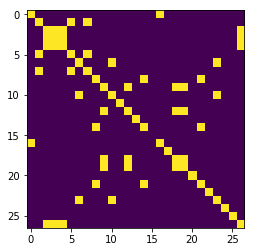

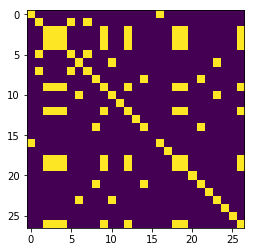

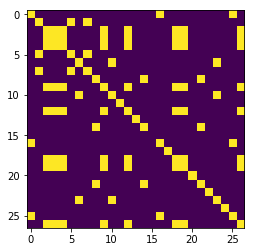

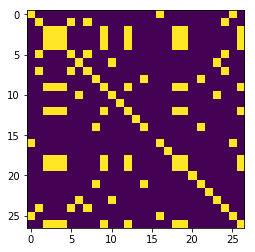

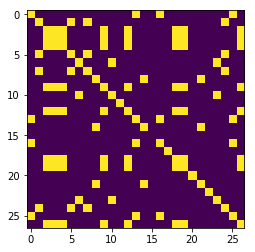

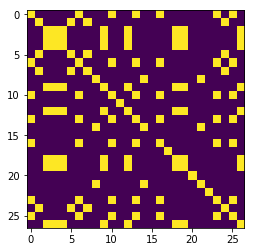

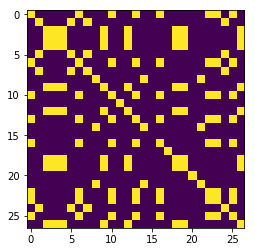

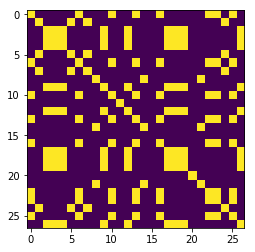

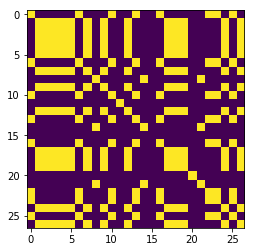

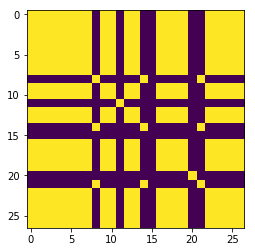

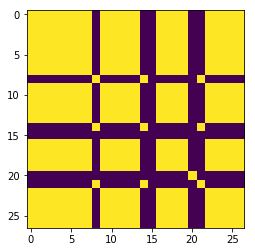

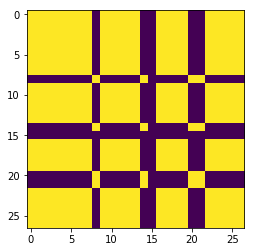

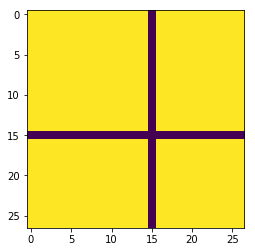

In [54]:
results = {
    'ham': result_ham,
    'jac': result_jac,
}
root = {}
def get_root(i):
    while not root[i] == i:
        i = root[i]
    return i

for res_name in ['ham', 'jac']:
#     res_name = 'ham'
    result = results[res_name]
    root = {}

    mat = np.zeros((N_USER, N_USER), dtype=np.int)
    for i in range(N_POINT):
        root[i] = i
    for n, row in enumerate(result):
        s = len(root)
        root[s] = s
        root[int(row[0])] = s
        root[int(row[1])] = s
        for i in range(N_POINT):
            for j in range(N_POINT):
                ui = point_to_user[i]
                uj = point_to_user[j]
                is_same = (get_root(i) == get_root(j))
                mat[ui, uj] = 1 if is_same else 0
                mat[uj, ui] = 1 if is_same else 0
        if (n == len(result) - 1) or (not result[n][2] == result[n + 1][2]):
            fig = plt.figure()
            plt.imshow(mat)
            np.save('{}data/cluster/cluster_{}_{:02d}.npy'.format(REPO, res_name, N_POINT - n - 1), mat)